# Winter 2021 Data Science Intern Challenge - Anita Tran

## Question 1 Analysis

(*Scroll down to the end of Question 1 if you would prefer a summary of the answers found from the analysis below. Question 2 answers are there too.*)

In [1]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [15]:
# Load the datset
df = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")

In [16]:
# check the data 
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [17]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


The transactions seem to be around the hundred, however there is a maximum value of 704000. This tells me there might be outliers or bulk orders purchased.

In [18]:
# Convert date to datetime so we can order
df['created_at'] = pd.to_datetime(df['created_at'])

In [19]:
# Resetting our index to the date
df.set_index('created_at', inplace=True)
df.sort_index(inplace=True)

In [20]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method
created_at,,,,,,
2017-03-01 00:08:09,1863,39,738,536,4,cash
2017-03-01 00:10:19,1742,39,910,268,2,cash
2017-03-01 00:14:12,3229,97,912,324,2,cash
2017-03-01 00:19:31,1268,80,798,290,2,credit_card
2017-03-01 00:22:25,2690,49,799,258,2,credit_card


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


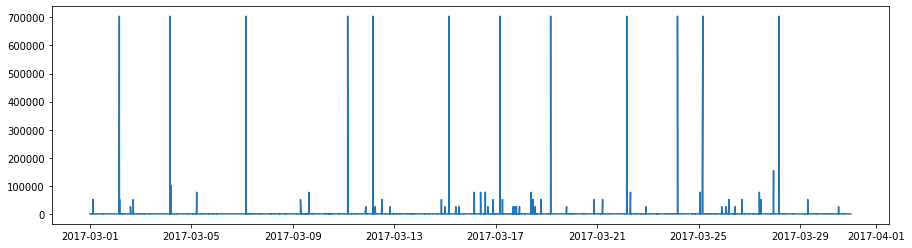

In [21]:
# Let's take a look at the order_amount
plt.figure(figsize=(15,4))

plt.plot(df.index, df['order_amount'])

There are large orders (>$10000) happening twice a week. Let's take a look and then decide what to do with them.

In [23]:
df[(df['order_amount'] > 10000)].describe()

,order_id,shop_id,user_id,order_amount,total_items
count,63.000000,63.000000,63.000000,63.000000,63.000000
mean,2574.841270,68.285714,797.380952,225901.587302,541.079365
std,1409.031402,16.107931,135.683506,293846.276600,894.029503
min,16.000000,42.000000,607.000000,25725.000000,1.000000
25%,1402.500000,42.000000,607.000000,25725.000000,1.000000
50%,2691.000000,78.000000,818.000000,51450.000000,2.000000
75%,3715.500000,78.000000,913.500000,704000.000000,2000.000000
max,4919.000000,78.000000,997.000000,704000.000000,2000.000000


63 out of 5000 purchases are over \\$10000 (1.3%). Something looks fishy. Our mean is taking in these bulk purchases into account, which might not be the best metric for this. We would never expect an average pair of shoes to cost $3145.13.

In [25]:
df['order_amount'].mean()

3145.128

We saw that our original choice of evaluation metric, AOV, is largely affected by the numerous extreme values in this dataset, both from the over \\$2000 item purchases and from the odd bulk order amounts that were multiples of $704000. 

To protect our evaluation metric from the effects of these outliers it would therefore be wise to instead use a robust evaluation metrix -> Median.

In [26]:
df['order_amount'].median()

284.0

## Question 1 Answers (Summary) 

**Question 1a.**

• Using out inital value of the AOV, we are blindly computing the average order amount without taking into account the number of pairs of shoes purchased in each transaction.
•Moreover, there are many transactions that seem questionable/erroneous:
-The several indentical transactions that included over $2000 purchases each are driving up the AOV.
•Due to the extreme points it would be preferable to use a robust evaluation metric (one which isn't affected by extreme values which will skew the average)


**Question 1b.**
To protect our evaluation metric from the effects of extreme/erroneous points it would be wise to use a robust evaluation metric: median. A median of a population is any value such that at most half of the population is less than the proposed median and at most half is greater than the proposed median.

**Question 1c.**
Median is $284, which is a more reasonable value for our measure of central tendancy than the mean (AOV) of \\$3145.13 given that we are talking about single-transaction purchases of shoes.

# Question 2

**Question 2a.How many orders were shipped by Speedy Express in total? **

***Answer: 54***

SELECT COUNT(*) <br />
FROM Orders AS o, Shippers AS s <br /> 
WHERE o.ShipperId = s.ShipperId AND ShipperName = "Speedy Express";

**Question 2b. What is the last name of the employee with the most orders? **<br />
***Answer: Peacock <br />
(10 orders)***


SELECT *, count(*) FROM [Orders] <br />
LEFT JOIN Employees <br />
ON Orders.EmployeeID = Employees.EmployeeID <br />
GROUP BY Orders.EmployeeID; <br />

**Question 2c.** <br />
***Answer: Rössle Sauerkraut & Lakkalikööri <br />

SELECT *, count(*) <br />
FROM [OrderDetails] as OD <br />
LEFT JOIN Products as P <br />
ON OD.ProductID = P.ProductID <br />
LEFT JOIN Orders as O <br />
ON OD.OrderID = O.OrderID <br />
LEFT JOIN Customers as C <br />
ON O.CustomerID = C.CustomerID <br />
GROUP BY P.ProductName <br />
HAVING C.Country = 'Germany' <br />
ORDER BY count(*) DESC <br />

**Further Analysis**

I would be interested to explore the most popular categories and where are they shipped to/ customer (countries) who are ordering them.